In [106]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


#Excersize 8 - Analyzing College dataset

#Exercise 8a - loading data and reading


In [107]:
college = pd.read_csv('College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#Exercise 8b - Dictionary and indexing


In [108]:
college2 = pd.read_csv ('College.csv', index_col =0)
college3 = college.rename({'Unnamed: 0': 'College Name'}, axis =1)
college3 = college3.set_index('College Name')
college3.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#Exercise 8c&d - summary statistics and scatter plot graphing


               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

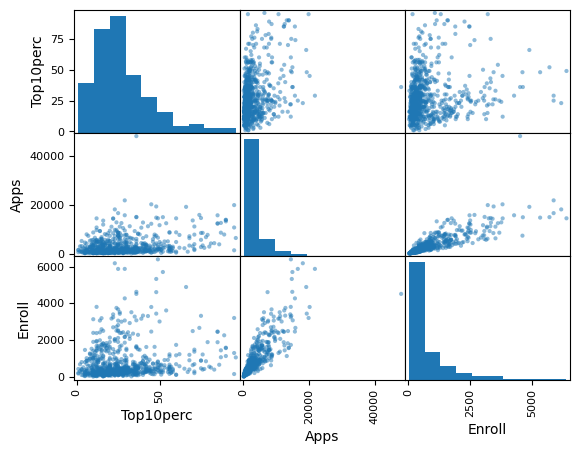

In [109]:
college = college3
print(college.describe())
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

#8e - Comparing Outofstate and Private tution


<Axes: title={'center': 'Outstate'}, xlabel='Private'>

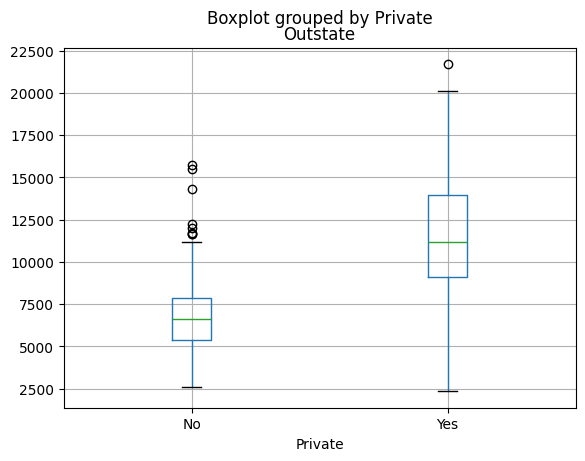

In [110]:
college.boxplot(column = 'Outstate', by = 'Private')

#8f - Generating Elite variable based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.


Elite
No     699
Yes     78
Name: count, dtype: int64


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

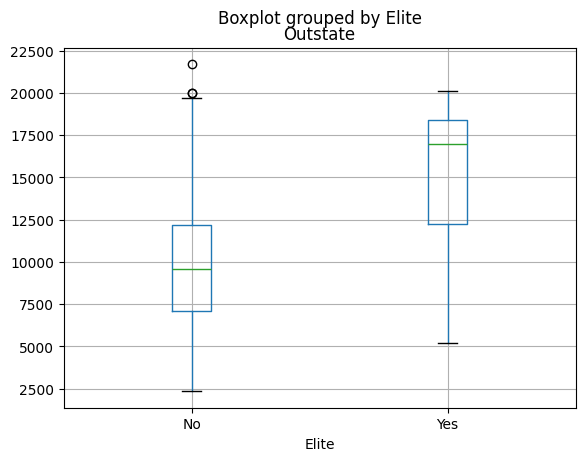

In [111]:
college['Elite'] = np.where(college['Top10perc'] > 50, 'Yes', 'No')
elite_counts = college['Elite'].value_counts()
print(elite_counts)
college.boxplot(column = 'Outstate', by = 'Elite')


##8g -  Plotting Quant Variables: Apps, Accept, Enroll, F.Undergrad

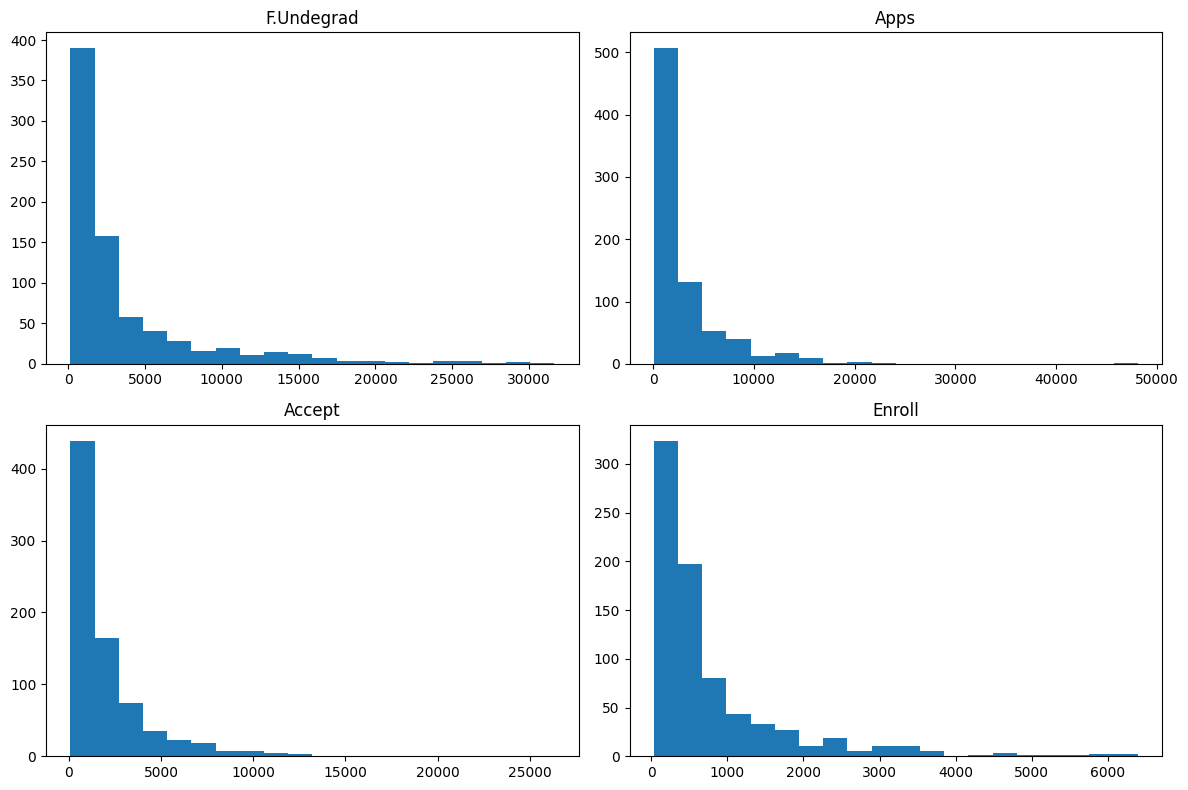

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(college['F.Undergrad'], bins=20)
axes[0, 0].set_title('F.Undegrad')

axes[0, 1].hist(college['Apps'], bins=20)
axes[0, 1].set_title('Apps')

axes[1, 0].hist(college['Accept'], bins=20)
axes[1, 0].set_title('Accept')

axes[1, 1].hist(college['Enroll'], bins=20)
axes[1, 1].set_title('Enroll')

plt.tight_layout()
plt.show()

#8h - Grouping room and board costs based on wheter student attends public or private insitution


<Axes: title={'center': 'Room.Board'}, xlabel='Private'>

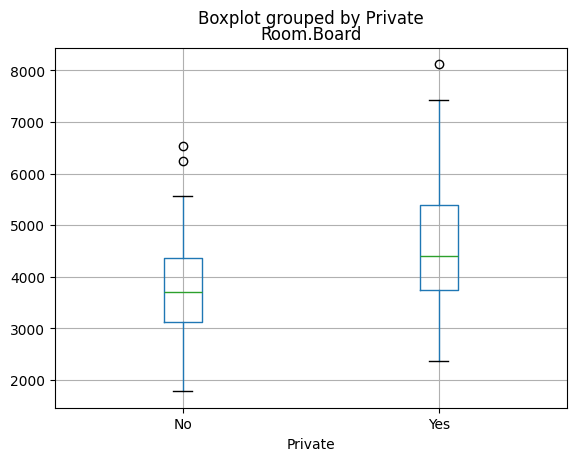

In [113]:
college.boxplot(column = 'Room.Board', by = 'Private')

This side by side comparison shows that private room and board costs on average tend to be a lot higher than public universitites. both the lower bound and upper bounds of private room and board costs were higher at private institutions. Outliers from both charts that were much higher could be explained as students who are outofstate or international students who are subject to ad




#Question 9 - Analyzing Auto dataset

In [114]:
auto_data = pd.read_csv('Auto.csv')
auto_data.head()

# cleaning as columns like horsepower have "?" inferring missing data
for column in auto_data.columns:
    if auto_data[column].dtype == 'object':
        auto_data[column] = pd.to_numeric(auto_data[column], errors='coerce')

#9a - Which of the predictors are quantitative, and which are qualitative

In [115]:
print(auto_data)
auto_data.describe()

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin  name  
0         1   NaN  
1         1   NaN  
2  

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,0.0
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


From the data set we can see that MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, and year are quantitative.

Name and Origin are the only qualitiative variables with name being the product's listing name and orgin being where in the world they are manufactured.

#9b - Ranges of quant variables

due to csv format most of the quant variable loaded as integers so i will change them to floats so I can find range


In [116]:
auto_data['mpg'] = auto_data['mpg'].astype(float)
auto_data['cylinders'] = auto_data['cylinders'].astype(float)
auto_data['displacement'] = auto_data['displacement'].astype(float)
auto_data['horsepower'] = auto_data['horsepower'].astype(float)
auto_data['weight'] = auto_data['weight'].astype(float)
auto_data['acceleration'] = auto_data['acceleration'].astype(float)
auto_data['year'] = auto_data['year'].astype(float)
range_mpg = auto_data['mpg'].max() - auto_data['mpg'].min()
range_cylinders = auto_data['cylinders'].max() - auto_data['cylinders'].min()
range_displacement = auto_data['displacement'].max() - auto_data['displacement'].min()
range_horsepower = auto_data['horsepower'].max() - auto_data['horsepower'].min()
range_weight = auto_data['weight'].max() - auto_data['weight'].min()
range_acceleration = auto_data['acceleration'].max() - auto_data['acceleration'].min()
range_year = auto_data['year'].max() - auto_data['year'].min()
print(f"Range of MPG is {range_mpg}")
print(f"Range of Cylinders is {range_cylinders}")
print(f"Range of Displacement is {range_displacement}")
print(f"Range of Horsepower is {range_horsepower}")
print(f"Range of Weight is {range_weight}")
print(f"Range of Acceleration is {range_acceleration}")
print(f"Range of Year is {range_year}")


Range of MPG is 37.6
Range of Cylinders is 5.0
Range of Displacement is 387.0
Range of Horsepower is 184.0
Range of Weight is 3527.0
Range of Acceleration is 16.8
Range of Year is 12.0


#9c - Mean and Standard Deviation of quant variables


In [117]:
auto_data[['mpg','cylinders','displacement', 'horsepower','weight', 'acceleration', 'year']].describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#9d - Removing the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [118]:
subset_auto_data = auto_data.drop(auto_data.index[9:85])
subset_auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,321.000000,321.000000,321.000000,317.000000,321.000000,321.000000,321.000000,321.000000,0.0
mean,24.438629,5.370717,187.049844,100.955836,2933.962617,15.723053,77.152648,1.598131,NaN
std,7.908184,1.653486,99.635385,35.895567,810.642938,2.680514,3.111230,0.816163,NaN
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000,NaN
25%,18.000000,4.000000,100.000000,75.000000,2215.000000,14.000000,75.000000,1.000000,NaN
50%,23.900000,4.000000,145.000000,90.000000,2795.000000,15.500000,77.000000,1.000000,NaN
75%,30.700000,6.000000,250.000000,115.000000,3504.000000,17.300000,80.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000,NaN


#9e - Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

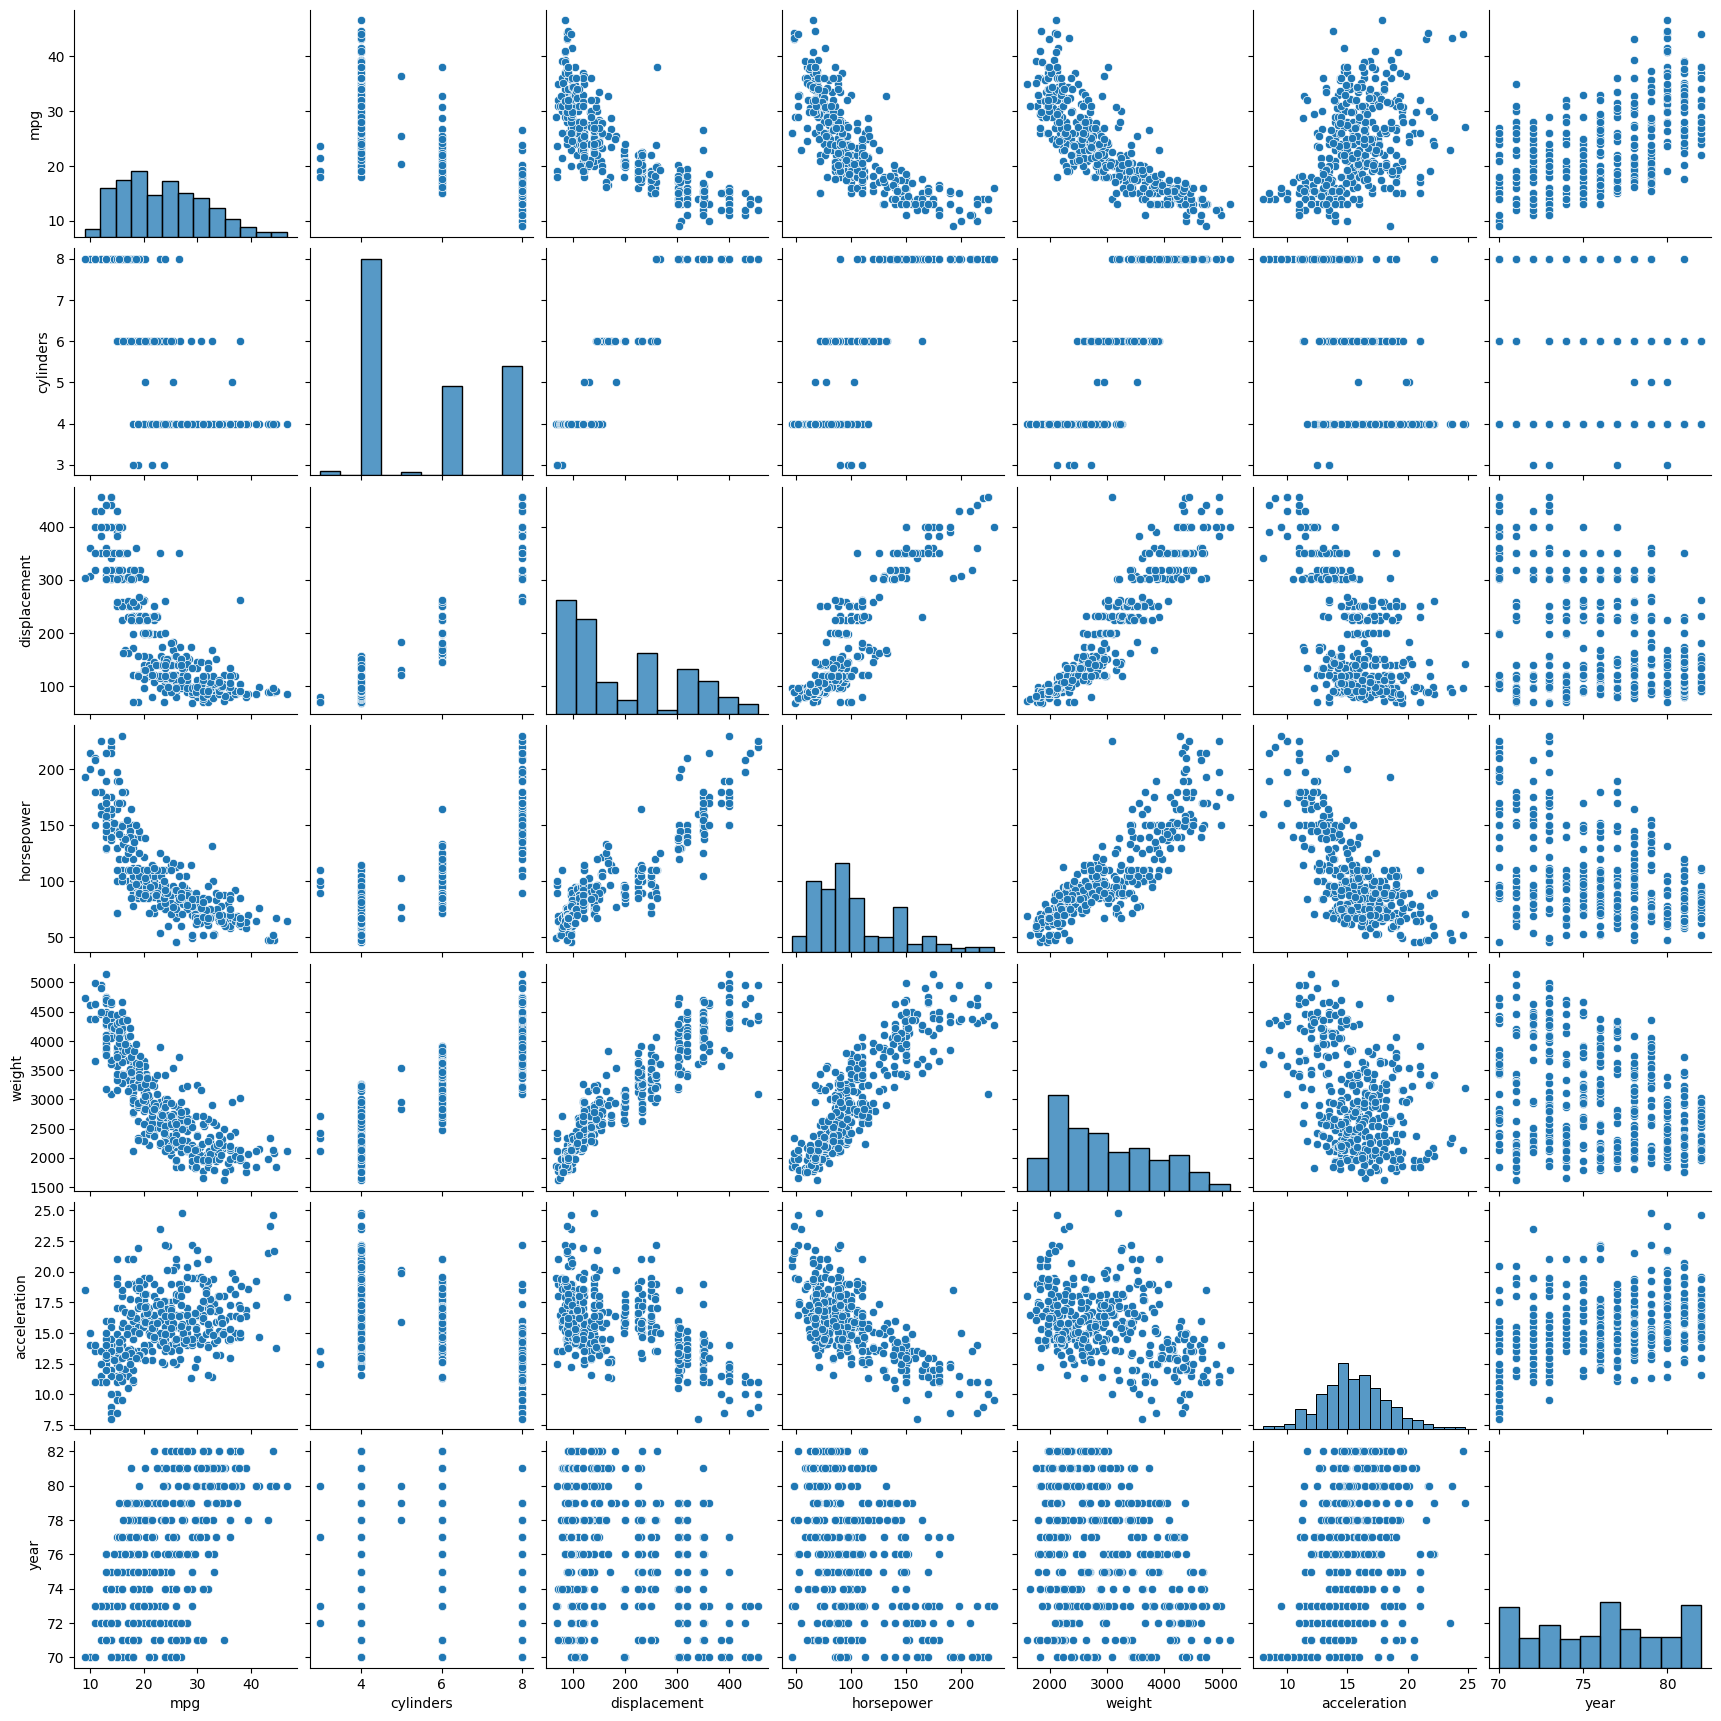

In [119]:
sns.pairplot(auto_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']])
plt.show()


From the plots below there are stronger relationships between variables where mpg is the explanatory variable as we use predictors like weight, horsepower, and dispalcement. Displacement as an explanatory variable has stronger realtionships to horsepower and weight. The other variables had similiar explanatory relationships however cylinders and year were the two variables that when treated as explanatory, did not yield any significant relationships when looking at the graphs.

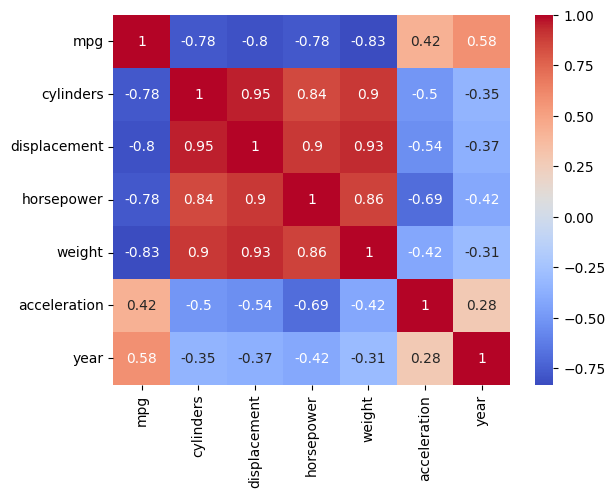

In [120]:
corr_matrix = auto_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Using this I can see there are correlation between mpg and cylinder, displacement, horsepower, weight, acceleration, and model year. Each of these can be used to predict the cars mpg.

#9f - Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

Both the correlation matrix and the histogram/scatterplots show that variables like displacement, horsepower, weight and acceleration had the strongest predictive relationships with mpg. Some of these make intutive sense like the faster one accelerates the more fuel they would use thus decreasing their mpg output. Stronger horsepower requires stronger fuel output which could mean that the manufacturer inteneded for a faster car that uses more gas to power it thus lowering mpg for increased horsepower.

#Exercise 10 - Boston housing data set



10a - Loading and reading

In [121]:
from ISLP import load_data
boston_data = load_data('Boston')
boston = pd.DataFrame(boston_data)
print(boston)
boston.columns

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

#10b - dimension of data set


In [122]:
boston.shape


(506, 13)

This dataset has 506 rows with 13 columns

#10c - pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.





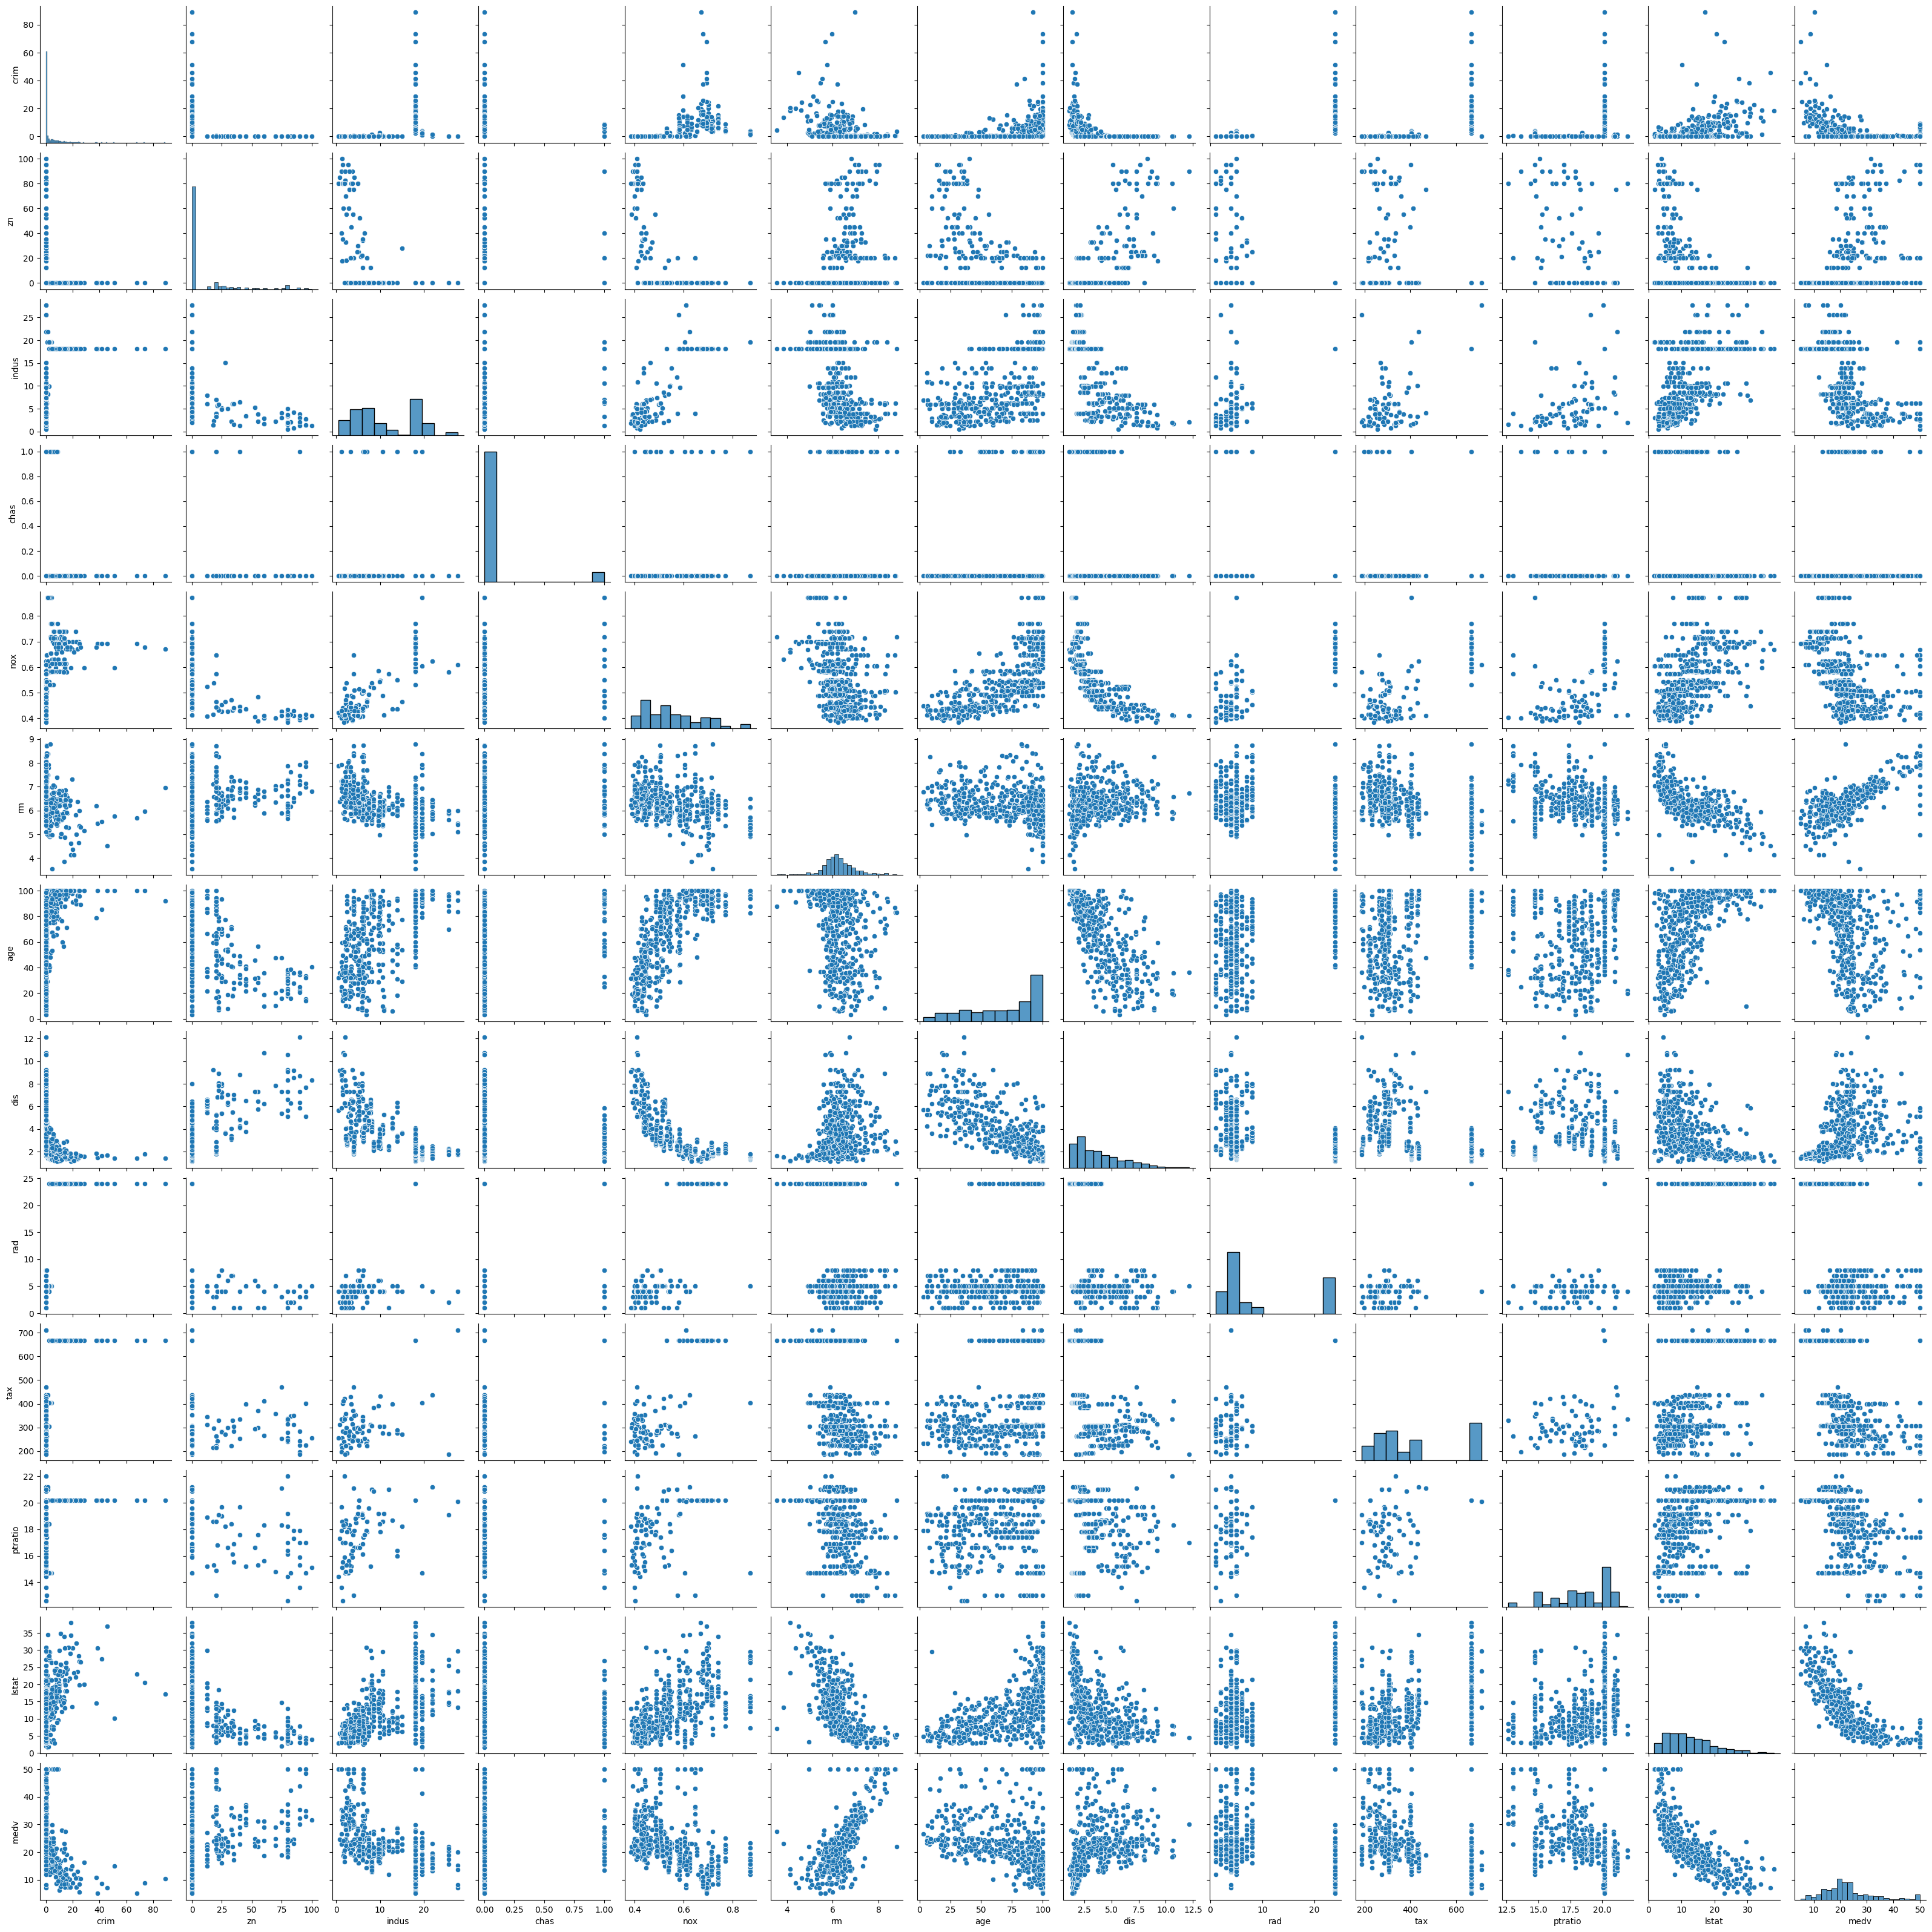

In [100]:
sns.pairplot(boston)
plt.show()

 there seem to be non linear relationships between crime and distance, age and nox, crime and age, dis and nox, age and nox. These were a few of the variable that had the most clear relationships that were shown through the graphs.

#10d - Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

Out of all the varaible associted with the crime rate, the one that had the clearest relationship was crime and median value of owner-occupied homes in $1000s. As median value increased crime rates decreased which is consistent with the idea that wealthier areas on average see less crime either due to mostly well off residents and better policing.

#10e - Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
The highest per capita crime rate is 88.9762
The lowest per capita crime rate is 0.00632
Range of crime is 88.96988


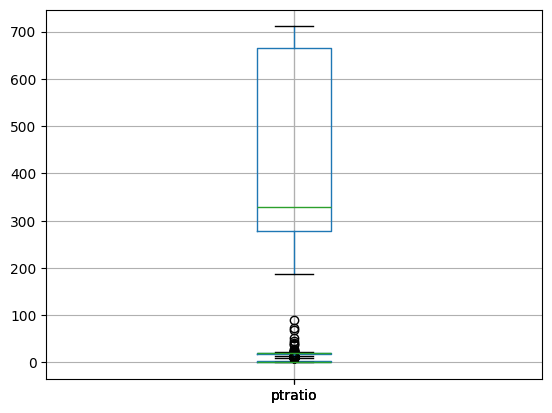

In [101]:
[print(boston.boxplot(column = 'crim'))], [print(boston.boxplot(column = 'tax'))], [print(boston.boxplot(column = 'ptratio'))]
boston_range_crim = boston['crim'].max() - boston['crim'].min()
print(f"The highest per capita crime rate is {boston['crim'].max()}")
print(f"The lowest per capita crime rate is {boston['crim'].min()}")
print(f"Range of crime is {boston_range_crim}")



Axes(0.125,0.11;0.775x0.77)
The highest tax rate is 711
The lowest tax rate is 187
Range of tax is 524


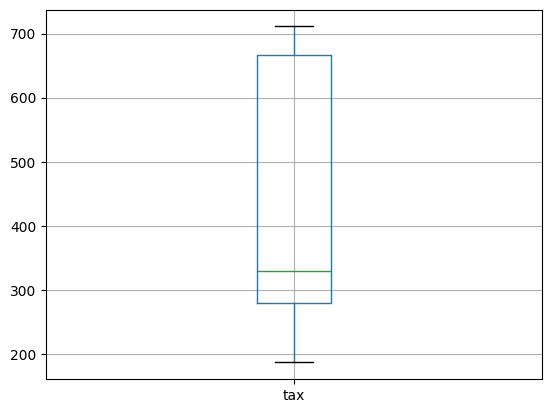

In [102]:
[print(boston.boxplot(column = 'tax'))]
print(f"The highest tax rate is {boston['tax'].max()}")
print(f"The lowest tax rate is {boston['tax'].min()}")
boston_range_tax = boston['tax'].max() - boston['tax'].min()
print(f"Range of tax is {boston_range_tax}")

Axes(0.125,0.11;0.775x0.77)
The highest pupil-teacher ratio is 22.0
The lowest pupil-teacher ratio is 12.6
Range of pupil-teacher ratio is 9.4


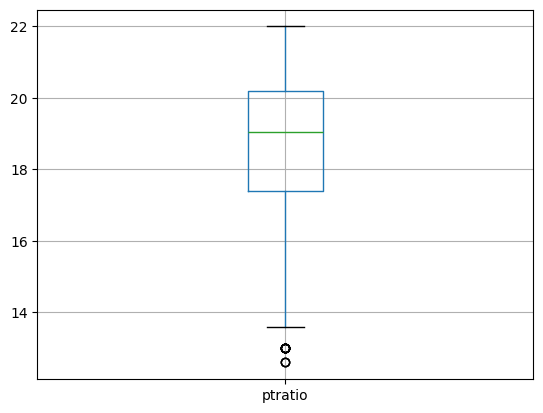

In [103]:
[print(boston.boxplot(column = 'ptratio'))]
boston_range_ptratio = boston['ptratio'].max() - boston['ptratio'].min()
print(f"The highest pupil-teacher ratio is {boston['ptratio'].max()}")
print(f"The lowest pupil-teacher ratio is {boston['ptratio'].min()}")
print(f"Range of pupil-teacher ratio is {boston_range_ptratio}")

The most surprising discrepancy came from crime rate where the higher crim are had a percapita rate of 88.97 and the lowest was 0.00632 showing a massive disparity in safety between suburbs. The was a discrepancy in school quality as well with some suburbs havinbg over worked teachers compared to other who had less of number of students to worry about. Tax rates were also interesting with the highest area boasting a full-value property-tax rate at 7,110,000 which is pretty well off to one that was around 1,870,000. this shows a massive discrepancy betweeen quality of life and safety wihtin the boston suburban area.

#10f - How many of the suburbs in this data set bound the Charles river?

In [104]:
boston['bound_by_river'] = np.where(boston['chas'] == 1, 'Yes', 'No')
river_count = boston['bound_by_river'].value_counts()
print(river_count)

bound_by_river
No     471
Yes     35
Name: count, dtype: int64


#10g - What is the median pupil-teacher ratio among the towns in this data set?



---





In [105]:
river_towns = np.array(np.where(boston['chas'] == 1))
median_riv_town_ptratio = np.median(river_towns)
print(f"The median pupil-teacher ratio in river towns is {median_riv_town_ptratio}")

The median pupil-teacher ratio in river towns is 222.0


#10h - Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [132]:
min_medv_index = boston['medv'].idxmin()
min_medv_row = boston.loc[min_medv_index]
print(f"the suburb with the lowest median value of owner occupied homes was suburb with a crime rate of {min_medv_row}")

the suburb with the lowest median value of owner occupied homes was suburb with a crime rate of crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


This town had a high ptratio, moderatly high taxrate, and a relatively concerning crime rate when looking at the ranges from oher towns

#PART 3

#1. Explore the data and visualize: what variab:les are interesting? Choose a few, plot them together, and tell a story.

In [138]:
#load the ben and jerry csv
ben_jerry = pd.read_csv('BenAndJerry.csv')
print(ben_jerry.head())


   quantity  price_paid_deal  price_paid_non_deal  coupon_value  \
0         2             6.82                 0.00           1.0   
1         1             3.50                 0.00           0.0   
2         1             3.50                 0.00           0.0   
3         1             0.00                 3.00           0.0   
4         1             0.00                 3.99           0.0   

   promotion_type  total_spent size1_descr       flavor_descr formula_descr  \
0             2.0        37.22   16.0 MLOZ        CAKE BATTER       REGULAR   
1             1.0        31.04   16.0 MLOZ  VAN CARAMEL FUDGE       REGULAR   
2             1.0        15.50   16.0 MLOZ  VAN CARAMEL FUDGE       REGULAR   
3             NaN       112.99   16.0 MLOZ          W-N-C-P-C       REGULAR   
4             NaN        67.35   16.0 MLOZ    AMERICONE DREAM       REGULAR   

   household_id  ...  projection_factor  fips_state_code  fips_county_code  \
0       2001456  ...               7675     

In [139]:
 print(ben_jerry.columns)


Index(['quantity', 'price_paid_deal', 'price_paid_non_deal', 'coupon_value',
       'promotion_type', 'total_spent', 'size1_descr', 'flavor_descr',
       'formula_descr', 'household_id', 'household_size', 'household_income',
       'age_of_female_head', 'age_of_male_head',
       'age_and_presence_of_children', 'male_head_employment',
       'female_head_employment', 'male_head_education',
       'female_head_education', 'marital_status', 'male_head_occupation',
       'female_head_occupation', 'household_composition', 'race',
       'hispanic_origin', 'region', 'scantrack_market_identifier',
       'projection_factor', 'fips_state_code', 'fips_county_code',
       'census_tract_county_code', 'type_of_residence', 'kitchen_appliances',
       'tv_items', 'female_head_birth', 'male_head_birth',
       'household_internet_connection'],
      dtype='object')


In [142]:
print(ben_jerry.describe())

           quantity  price_paid_deal  price_paid_non_deal  coupon_value  \
count  21974.000000     21974.000000         21974.000000  21974.000000   
mean       1.281924         1.742060             2.452375      0.160221   
std        0.727348         2.553262             2.765993      0.642449   
min        1.000000         0.000000             0.000000      0.000000   
25%        1.000000         0.000000             0.000000      0.000000   
50%        1.000000         0.000000             2.990000      0.000000   
75%        1.000000         3.340000             3.557500      0.000000   
max       21.000000        28.880000            69.720000     12.950000   

       promotion_type   total_spent  household_id  household_size  \
count     8994.000000  21974.000000  2.197400e+04    21974.000000   
mean         1.443073     78.158022  1.661201e+07        2.456403   
std          0.779288     80.457733  1.168595e+07        1.336821   
min          1.000000      2.000000  2.000358e+0

In [149]:

# Data Dictionary Mappings
region_map = {1: 'East', 2: 'Central', 3: 'South', 4: 'West'}
promotion_map = {1: 'Discount', 2: 'Coupon', None: 'No Promotion'}




In [154]:
#looking for insights
def pop_flavors(data, n=5):
  """top selling flavors"""
  flavor_sales = ben_jerry.groupby('flavor_descr')['quantity'].sum().sort_values(ascending=False)
  print("Top Selling Flavors:")
  print(flavor_sales.head(n))
  flavor_sales.head(n).plot(kind='bar', title='Top Selling Flavors')
  plt.xlabel('Flavor')
  plt.ylabel('Total Quantity Sold')
  plt.show()

def region_spending(data):
  """spending habits by region."""
  region_spending = ben_jerry.groupby('region')['total_spent'].sum().sort_values(ascending=False)
  print("Total Spending by Region:")
  print(region_spending)
  region_spending.plot(kind='pie', autopct='%1.1f%%', title='Spending by Region')
  plt.ylabel('')
  plt.show()

def prom_effectiveness(data):
  """effectiveness of promotions."""
  promo_effectiveness = ben_jerry.groupby('promotion_type')['total_spent'].sum()
  print("Promotion Effectiveness:")
  print(promo_effectiveness)
  promo_effectiveness.plot(kind='bar', title='Effectiveness of Promotions')
  plt.xlabel('Promotion Type')
  plt.ylabel('Total Spending')
  plt.show()

def character_insight(data):
  """spending habits by character."""
  household_spending = ben_jerry.groupby('type_of_residence')['total_spent'].sum()
  print("Spending by Household Type:")
  print(household_spending)
  household_spending.plot(kind='bar', title='Household Type vs Spending')
  plt.xlabel('Household Type')
  plt.ylabel('Total Spending')
  plt.show()



Top Selling Flavors:
flavor_descr
CHERRY GRCA            2743
CHC FUDGE BROWNIE      1684
HEATH COFFEE CRUNCH    1440
CHUNKY MONKEY          1372
CHC CHIP C-DH          1273
Name: quantity, dtype: int64


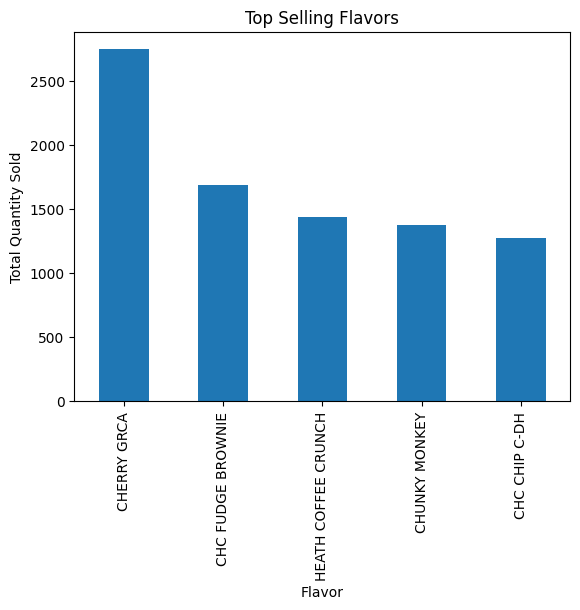

In [157]:
pop_flavors(ben_jerry)

Total Spending by Region:
region
South      541613.71
Central    416466.16
West       413015.26
East       346349.24
Name: total_spent, dtype: float64


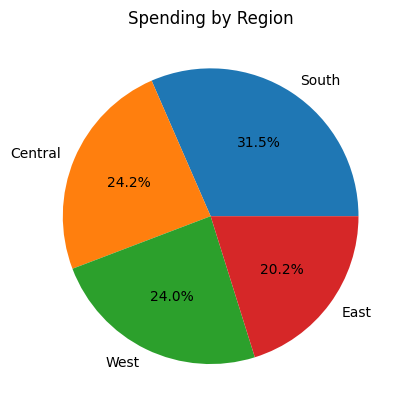

In [158]:
region_spending(ben_jerry)

Promotion Effectiveness:
promotion_type
Coupon            74930.58
Discount         420910.39
No Promotion    1108884.26
Name: total_spent, dtype: float64


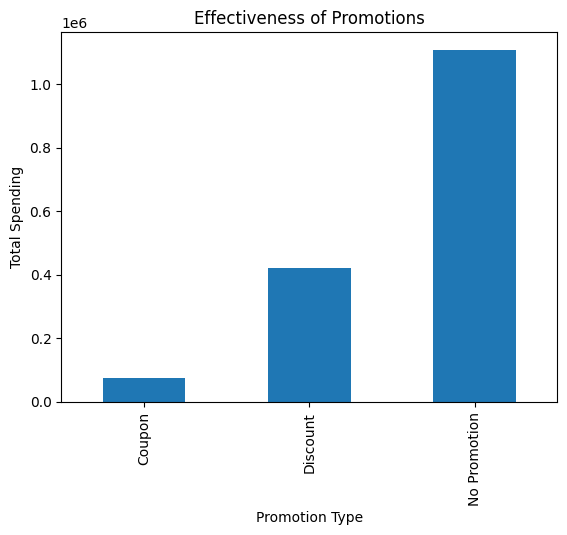

In [159]:
prom_effectiveness(ben_jerry)

Spending by Household Type:
type_of_residence
1    1332125.86
2      25285.85
3      44981.19
4       6803.45
5     175461.15
6      63235.82
7      69551.05
Name: total_spent, dtype: float64


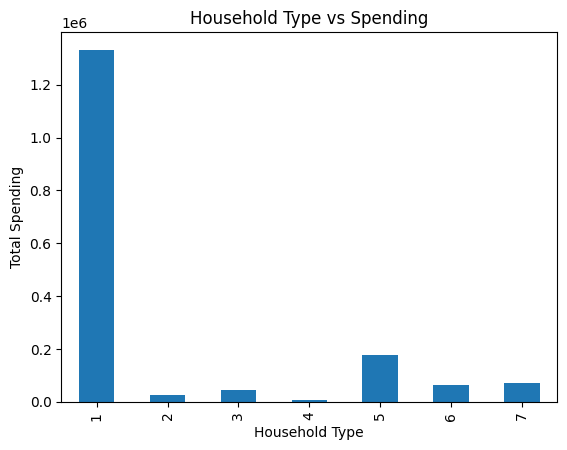

In [160]:
character_insight(ben_jerry)

#2.Describe the regression model in the code. Improve it?

#3. Take the p-values from your regression and look for evidence of association. Relate what you learn to your story from 1. 2
